In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings as w
w.filterwarnings("ignore")

In [13]:
data = pd.read_csv("Data/Full Data/page_views.csv")

In [4]:
data.head()

,book,release,chapter,page,chapter_number,section_number,institution_id,class_id,student_id,dt_accessed,was_complete,tried_again_dt,tried_again_clicks,engaged,idle_brief,idle_long,off_page_brief,off_page_long,review_flag
0,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:45:38Z,False,NaN,0,58341.0,0.0,0.0,0.0,0.0,False
1,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-12T03:13:17Z,False,NaN,0,128493.0,0.0,0.0,25928.0,0.0,False
2,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:06:15Z,False,NaN,0,101640.0,0.0,0.0,0.0,0.0,False
3,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T04:08:24Z,False,NaN,0,97608.0,0.0,0.0,0.0,0.0,False
4,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.4 Introduction to R Functions,1.0,4.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:07:58Z,False,NaN,0,177173.0,0.0,0.0,0.0,0.0,False


In [5]:
data.describe()

,chapter_number,section_number,tried_again_clicks,engaged,idle_brief,idle_long,off_page_brief,off_page_long
count,467656.000000,467656.000000,478752.000000,4.515430e+05,4.515430e+05,4.515430e+05,4.515430e+05,4.515430e+05
mean,5.999040,5.720068,0.149656,3.168891e+05,1.165663e+05,1.121664e+05,1.016224e+05,1.347988e+06
std,3.362731,3.452544,0.752891,7.191257e+05,3.553262e+05,1.449622e+06,2.960130e+05,5.839415e+06
min,1.000000,1.000000,0.000000,-5.576060e+05,0.000000e+00,0.000000e+00,-1.587420e+05,0.000000e+00
25%,3.000000,3.000000,0.000000,1.521600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000,5.000000,0.000000,1.140410e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000,8.000000,0.000000,4.121615e+05,0.000000e+00,0.000000e+00,4.199850e+04,0.000000e+00
max,16.000000,16.000000,31.000000,4.264212e+07,1.066066e+07,4.317840e+07,1.422484e+07,2.178254e+08


In [6]:
data.isna().sum()

book                       0
release                    0
chapter                    0
page                       0
chapter_number         11096
section_number         11096
institution_id             0
class_id                   0
student_id                 0
dt_accessed                9
was_complete               9
tried_again_dt        443905
tried_again_clicks         0
engaged                27209
idle_brief             27209
idle_long              27209
off_page_brief         27209
off_page_long          27209
review_flag                0
dtype: int64

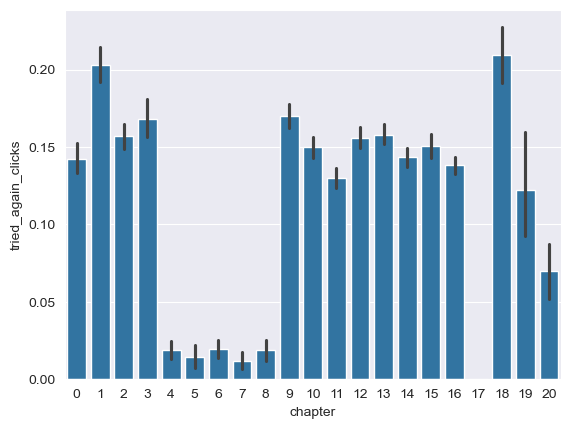

In [7]:
#find the correlation between chapter values and the tried again_clicks column label encode the column for books
encoder = LabelEncoder()
data['book'] = encoder.fit_transform(data['book'])
data['chapter'] = encoder.fit_transform(data['chapter'])

plt = sns.barplot(x='chapter', y='tried_again_clicks', data=data)

In [8]:
average_retries = data.groupby('chapter')['tried_again_clicks'].mean()
average_retries

chapter
0     0.142542
1     0.202791
2     0.156806
3     0.168395
4     0.018846
5     0.014148
6     0.019327
7     0.011900
8     0.018717
9     0.170034
10    0.149826
11    0.129924
12    0.155554
13    0.157957
14    0.143297
15    0.150718
16    0.138175
17    0.000000
18    0.209487
19    0.122386
20    0.069968
Name: tried_again_clicks, dtype: float64

In [9]:
total_retries = data.groupby('chapter')['tried_again_clicks'].sum()
total_retries

chapter
0     3817
1     4708
2     3766
3     2955
4       64
5       25
6       77
7       29
8       35
9     9763
10    7141
11    6718
12    6460
13    8013
14    6276
15    4377
16    5632
17       0
18    1528
19     199
20      65
Name: tried_again_clicks, dtype: int64

In [10]:
#find how many accesses each chapter has
chapter_accesses = data['chapter'].value_counts()
chapter_accesses

chapter
9     57418
11    51707
13    50729
10    47662
14    43797
12    41529
16    40760
15    29041
0     26778
2     24017
1     23216
3     17548
18     7294
6      3984
4      3396
7      2437
8      1870
5      1767
19     1626
17     1247
20      929
Name: count, dtype: int64

In [ ]:
student_data = data.groupby('student_id')
student_data.head()

In [18]:
student_data.describe()

chapter_number                           \
                                              count      mean       std  min   
student_id                                                                     
001824fb-a2fd-431d-aef6-7a1250d97a62          541.0  5.846580  3.097868  1.0   
0096491a-77bf-4e79-b906-fc7a8e5e57a6          317.0  6.892744  3.949184  1.0   
00a53a52-aa0e-4ddc-afa8-2c50c21dfd03          175.0  2.931429  1.262130  1.0   
00fe5bb2-6b64-4a36-a706-eac4dc124ea7          260.0  6.461538  3.352297  1.0   
016e2fcf-0cc2-42ad-844d-e1057b5081cc           48.0  1.666667  0.476393  1.0   
...                                             ...       ...       ...  ...   
fecf18d0-a58a-4d11-a353-ea73fbfa6860          294.0  5.768707  3.377436  1.0   
fef083e8-7167-4f42-82d5-d2e893aa408a          119.0  8.647059  1.350381  7.0   
ff548e42-0011-4dd7-ab46-2552503ad60c           14.0  3.214286  2.805998  1.0   
ff55bab4-812b-405b-9856-8bedf9fb11f9          321.0  7.492212  4.329488  1.0   
ff6ec9fe-de1d-4b45-8136-59465d9c85ab          367.0  7.495913  4.304574  1.0   

                                                            section_number  \
                                      25%  50%    75%   max          count   
student_id                                                                   
001824fb-a2fd-431d-aef6-7a1250d97a62  3.0  6.0   8.00  12.0          541.0   
0096491a-77bf-4e79-b906-fc7a8e5e57a6  3.0  6.0  10.00  14.0          317.0   
00a53a52-aa0e-4ddc-afa8-2c50c21dfd03  2.0  3.0   4.00   5.0          175.0   
00fe5bb2-6b64-4a36-a706-eac4dc124ea7  4.0  6.0   9.00  13.0          260.0   
016e2fcf-0cc2-42ad-844d-e1057b5081cc  1.0  2.0   2.00   2.0           48.0   
...                                   ...  ...    ...   ...            ...   
fecf18d0-a58a-4d11-a353-ea73fbfa6860  3.0  5.0   9.00  13.0          294.0   
fef083e8-7167-4f42-82d5-d2e893aa408a  7.0  9.0  10.00  11.0          119.0   
ff548e42-0011-4dd7-ab46-2552503ad60c  1.0  1.0   5.75   9.0           14.0   
ff55bab4-812b-405b-9856-8bedf9fb11f9  4.0  7.0  11.00  16.0          321.0   
ff6ec9fe-de1d-4b45-8136-59465d9c85ab  4.0  6.0  11.00  16.0          367.0   

                                                ... off_page_brief             \
                                          mean  ...            75%        max   
student_id                                      ...                             
001824fb-a2fd-431d-aef6-7a1250d97a62  5.430684  ...      417526.25  7248853.0   
0096491a-77bf-4e79-b906-fc7a8e5e57a6  5.615142  ...       99505.50  1231985.0   
00a53a52-aa0e-4ddc-afa8-2c50c21dfd03  6.217143  ...      146806.00  1541809.0   
00fe5bb2-6b64-4a36-a706-eac4dc124ea7  6.030769  ...       28050.00  1541122.0   
016e2fcf-0cc2-42ad-844d-e1057b5081cc  4.250000  ...         152.75  1031142.0   
...                                        ...  ...            ...        ...   
fecf18d0-a58a-4d11-a353-ea73fbfa6860  5.666667  ...      117355.00  2455046.0   
fef083e8-7167-4f42-82d5-d2e893aa408a  5.008403  ...      171425.00  3914682.0   
ff548e42-0011-4dd7-ab46-2552503ad60c  4.785714  ...       43353.00   457233.0   
ff55bab4-812b-405b-9856-8bedf9fb11f9  5.264798  ...       66432.00  1840851.0   
ff6ec9fe-de1d-4b45-8136-59465d9c85ab  6.111717  ...      185177.50  2356016.0   

                                     off_page_long                \
                                             count          mean   
student_id                                                         
001824fb-a2fd-431d-aef6-7a1250d97a62         548.0  4.767959e+06   
0096491a-77bf-4e79-b906-fc7a8e5e57a6         307.0  1.481106e+06   
00a53a52-aa0e-4ddc-afa8-2c50c21dfd03         160.0  5.801527e+05   
00fe5bb2-6b64-4a36-a706-eac4dc124ea7         254.0  1.039904e+06   
016e2fcf-0cc2-42ad-844d-e1057b5081cc          56.0  7.686373e+04   
...                                            ...           ...   
fecf18d0-a58a-4d11-a353-ea73fbfa6860         274.0  1.083340e+05   
fef083e8

,count,mean,std,min,25%,50%,75%,max
student_id,,,,,,,,
001824fb-a2fd-431d-aef6-7a1250d97a62,578.0,0.044983,0.296807,0.0,0.0,0.0,0.00,2.0
0096491a-77bf-4e79-b906-fc7a8e5e57a6,321.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,177.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
00fe5bb2-6b64-4a36-a706-eac4dc124ea7,265.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
016e2fcf-0cc2-42ad-844d-e1057b5081cc,56.0,1.071429,2.016812,0.0,0.0,0.0,1.25,7.0
...,...,...,...,...,...,...,...,...
fecf18d0-a58a-4d11-a353-ea73fbfa6860,306.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
fef083e8-7167-4f42-82d5-d2e893aa408a,119.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
ff548e42-0011-4dd7-ab46-2552503ad60c,17.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [27]:
question_data = pd.read_csv("Data/Random Sample of Data Files/responses.csv")

In [28]:
question_data = question_data.groupby('lrn_type')

In [29]:
#select the questions that are plain text 
plain_text = question_data.get_group('plaintext')

In [30]:
plain_text.head()

,book,release,chapter,page,chapter_number,section_number,review_flag,institution_id,class_id,student_id,...,lrn_option_2,lrn_option_3,lrn_option_4,lrn_option_5,lrn_option_6,lrn_option_7,lrn_option_8,lrn_option_9,lrn_option_10,lrn_option_11
965,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.6 Goals of This Course,1.0,6.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,04347fe5-e55a-4adc-86f2-a156ddfcfc13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.6 Goals of This Course,1.0,6.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,0d5d3654-7d7e-4da2-aff1-fe5405dfca9d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.6 Goals of This Course,1.0,6.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,d1f06dc8-661f-4e3c-95b7-b35b94aa251f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.6 Goals of This Course,1.0,6.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,dc28e7ae-4a4a-494c-bffa-a7036fff14cb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.6 Goals of This Course,1.0,6.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,f4a10383-174f-4ca6-b7a0-1150d9e591e3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
plain_text["prompt"].nunique()

212

In [32]:
#list the groups of the question
question_data.groups.keys()

dict_keys(['association', 'choicematrix', 'clozeassociation', 'formulaV2', 'imageclozeassociation', 'mcq', 'plaintext', 'shorttext', 'sortlist'])

In [33]:
short_text = question_data.get_group('shorttext')
short_text["prompt"].nunique()

41